In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import itertools

In [113]:
df = pd.read_csv("../data/Sample Student Data File.csv")
df.head(5)

stu_id                    stu_name                          email  \
0  20004488           SAFFRON, Corgipoo     CorgipooSAF@connect.ust.hk   
1  20023331             HYSSOP, Chamois      ChamoisHYS@connect.ust.hk   
2  20043679               LEEKS, Beetle       BeetleLEE@connect.ust.hk   
3  20067232  CHRYSANTHEMUM, Abelisaurus  AbelisaurusCHR@connect.ust.hk   
4  20076931              CELERIAC, Aniu         AniuCEL@connect.ust.hk   

   k1_energy  k2_energy  k3_tick1  k3_tick2  my_pref  concerns  
0         26         80         0         0      NaN       NaN  
1         27         85         0         0      NaN       NaN  
2         71         40         0         0      NaN       NaN  
3         57         60         0         0      NaN       NaN  
4         54         80         0         0      NaN       NaN

Imported v0.1.58. After importing, execute '%matplotlib inline' to display charts in Jupyter.
    AV = AutoViz_Class()
    dfte = AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=1, lowess=False,
               chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30, save_plot_dir=None)
Update: verbose=0 displays charts in your local Jupyter notebook.
        verbose=1 additionally provides EDA data cleaning suggestions. It also displays charts.
        verbose=2 does not display charts but saves them in AutoViz_Plots folder in local machine.
        chart_format='bokeh' displays charts in your local Jupyter notebook.
        chart_format='server' displays charts in your browser: one tab for each chart type
        chart_format='html' silently saves interactive HTML files in your local machine
Shape of your Data Set loaded: (100, 9)
#######################################################################################
######################## C L A S S I 

    9 Predictors classified...
        5 variables removed since they were ID or low-information variables
        List of variables removed: ['stu_id', 'stu_name', 'email', 'my_pref', 'concerns']
Number of All Scatter Plots = 3


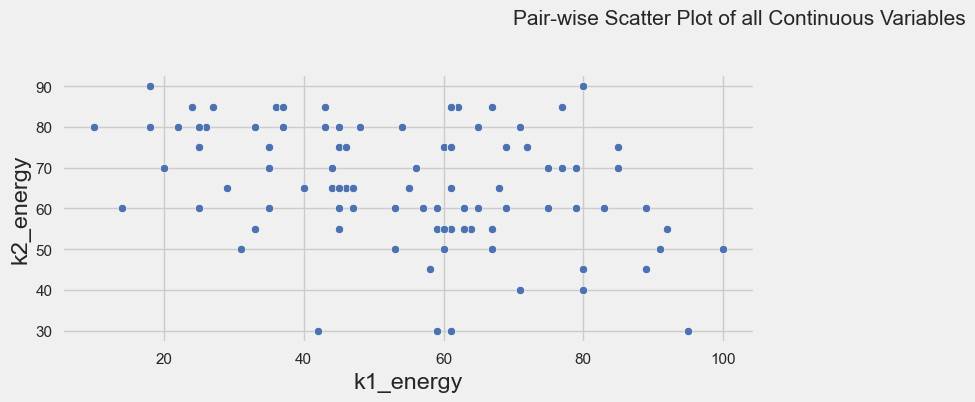

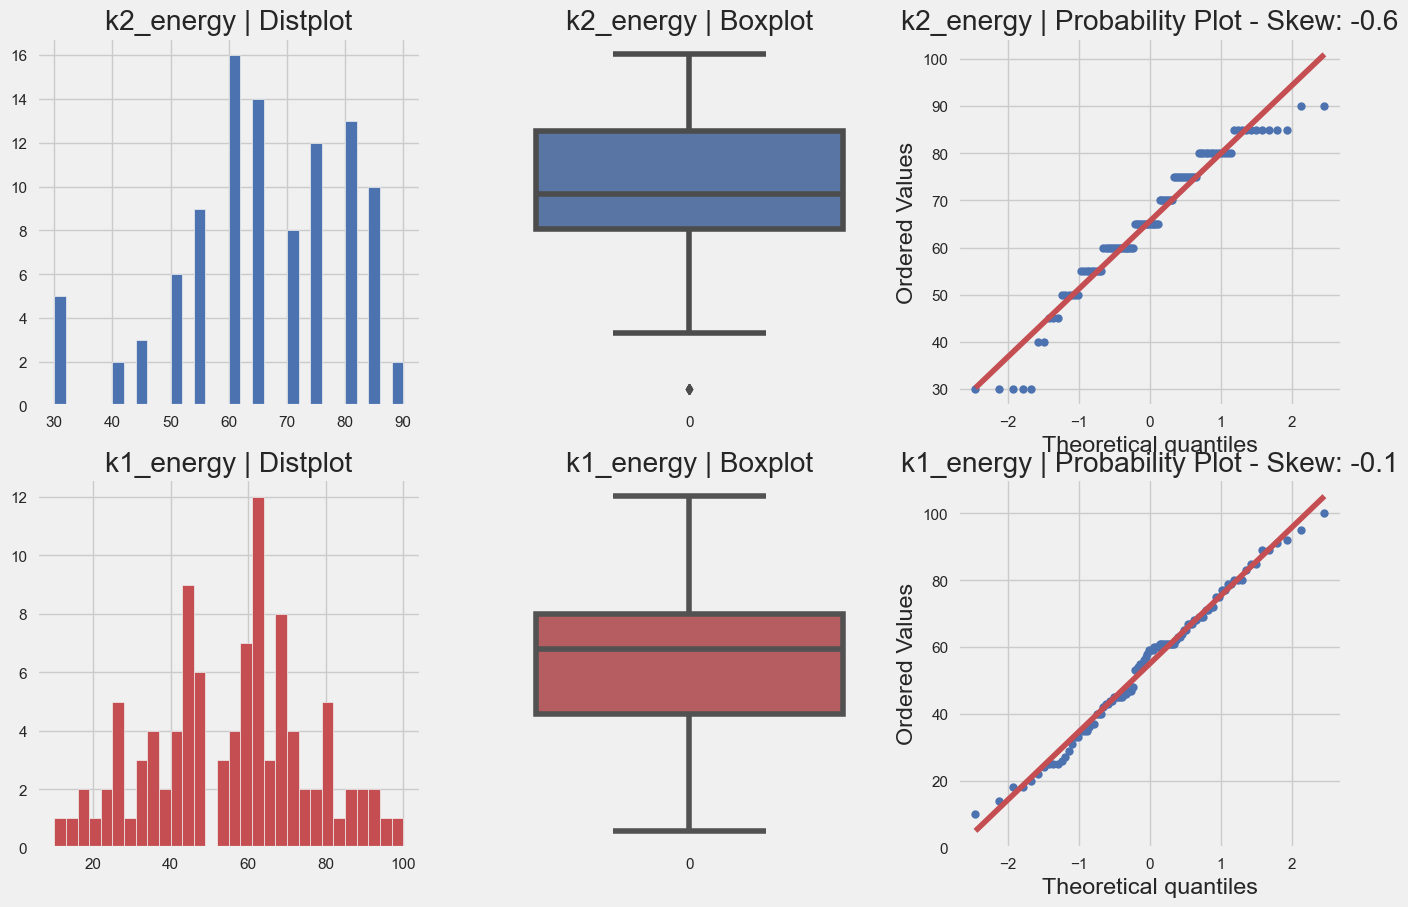

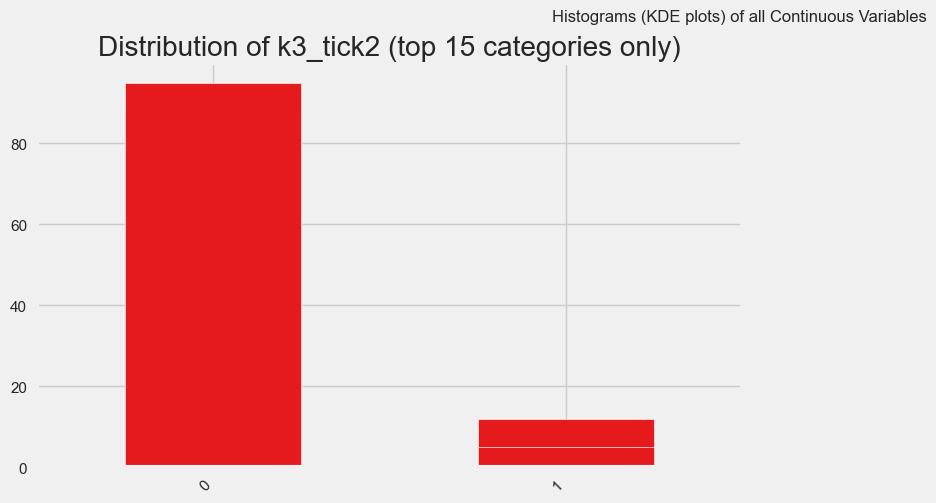

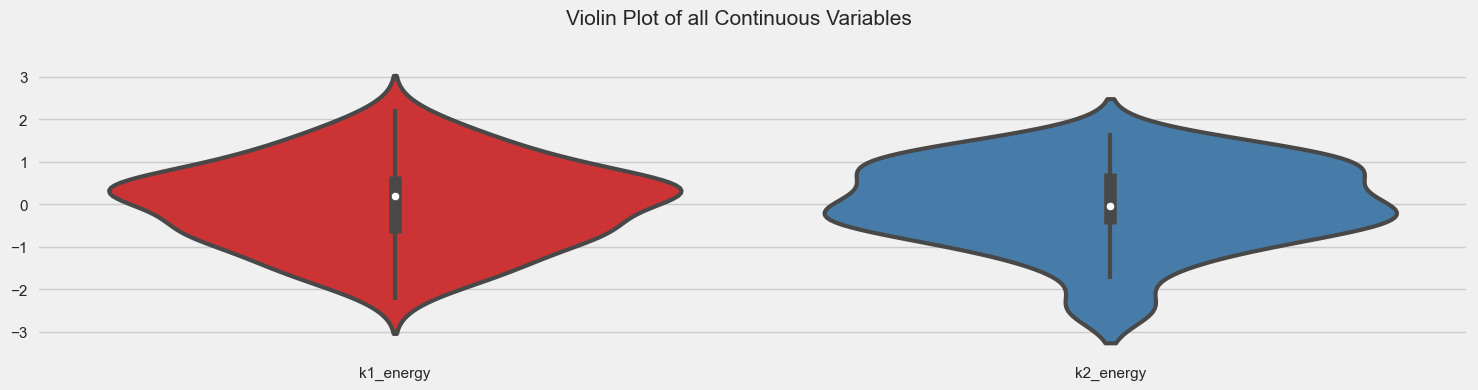

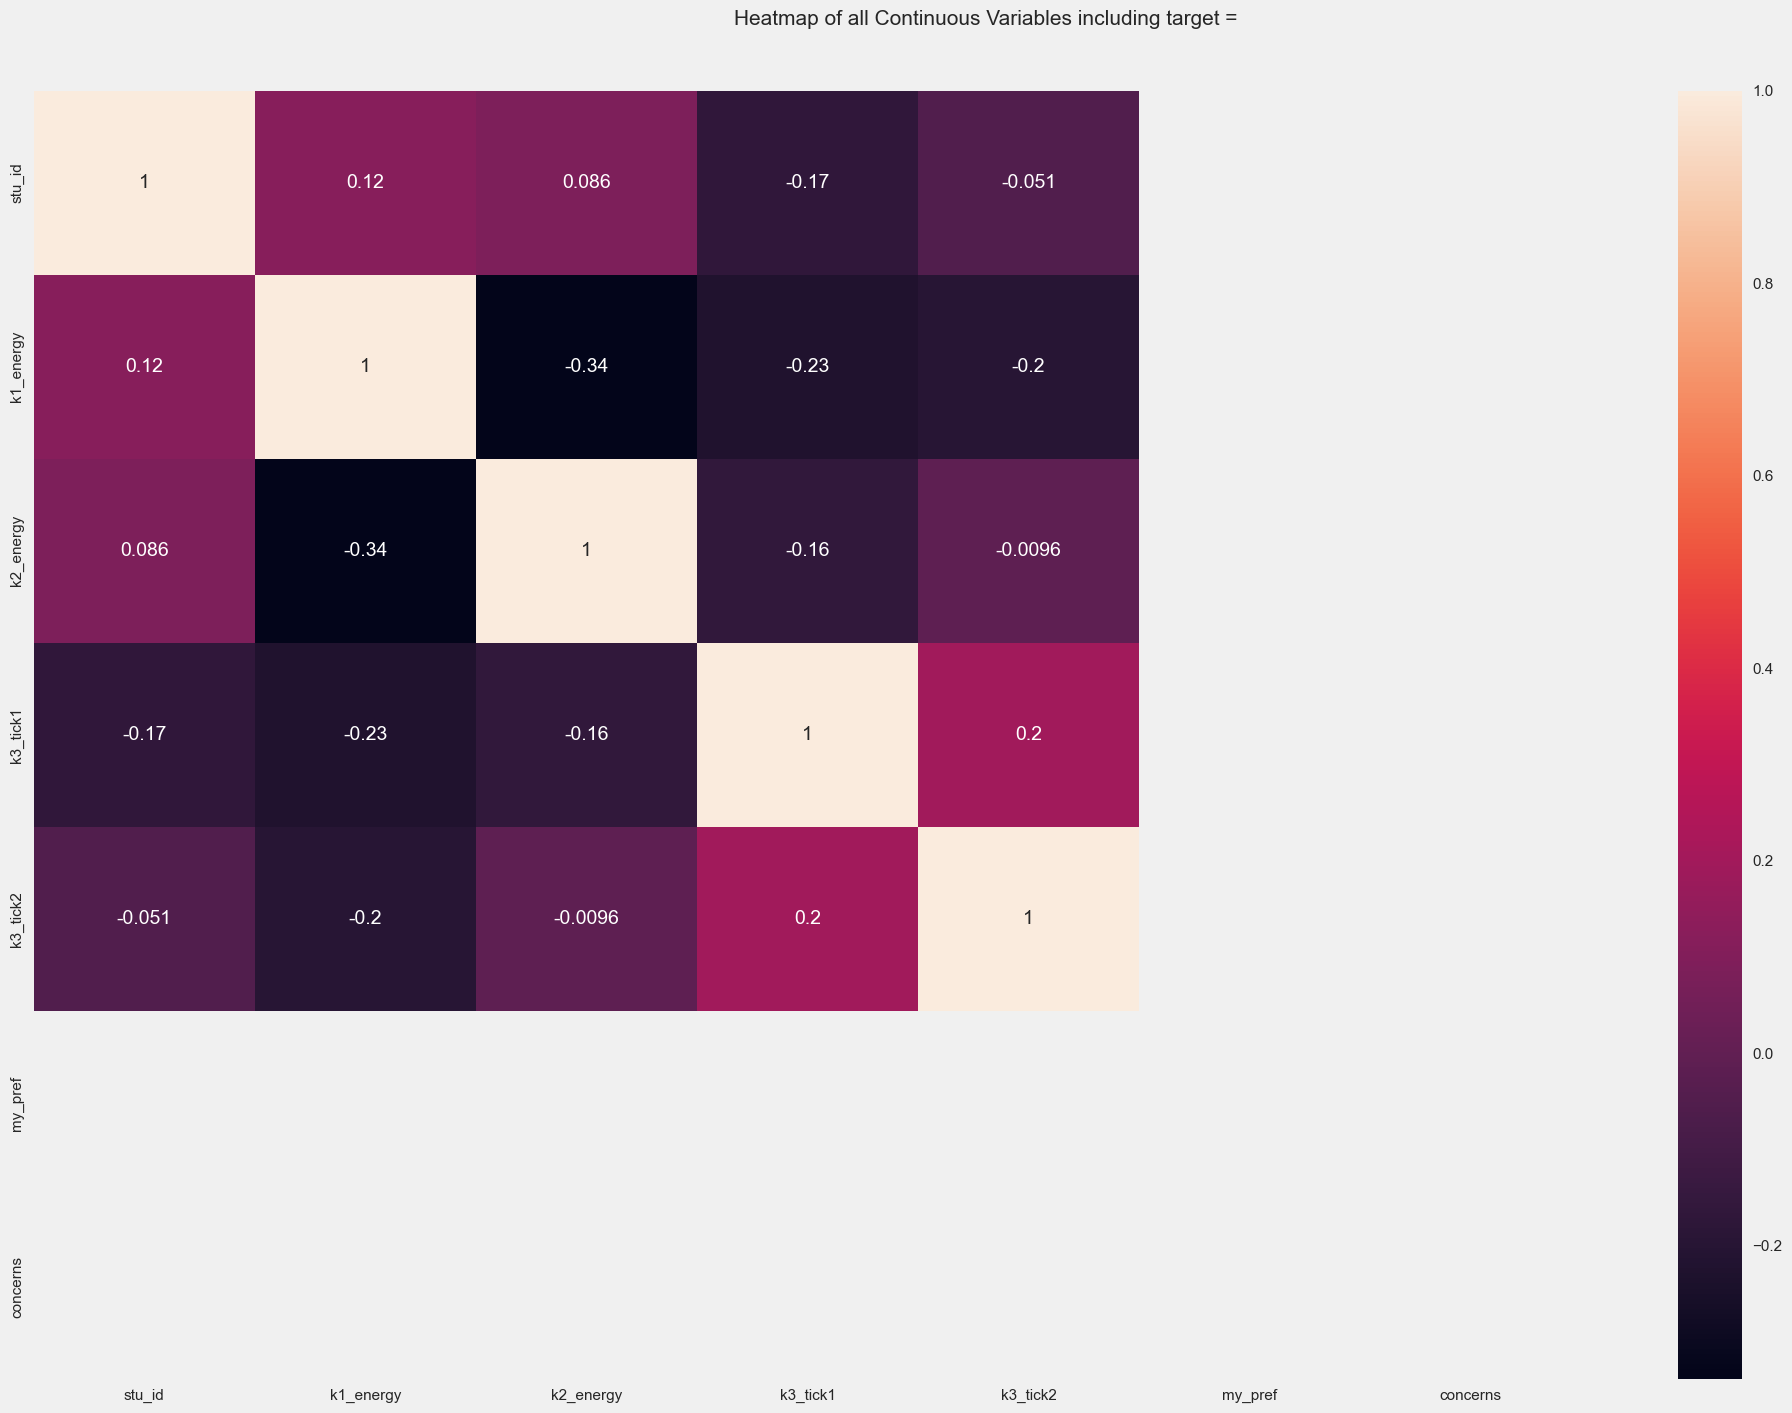

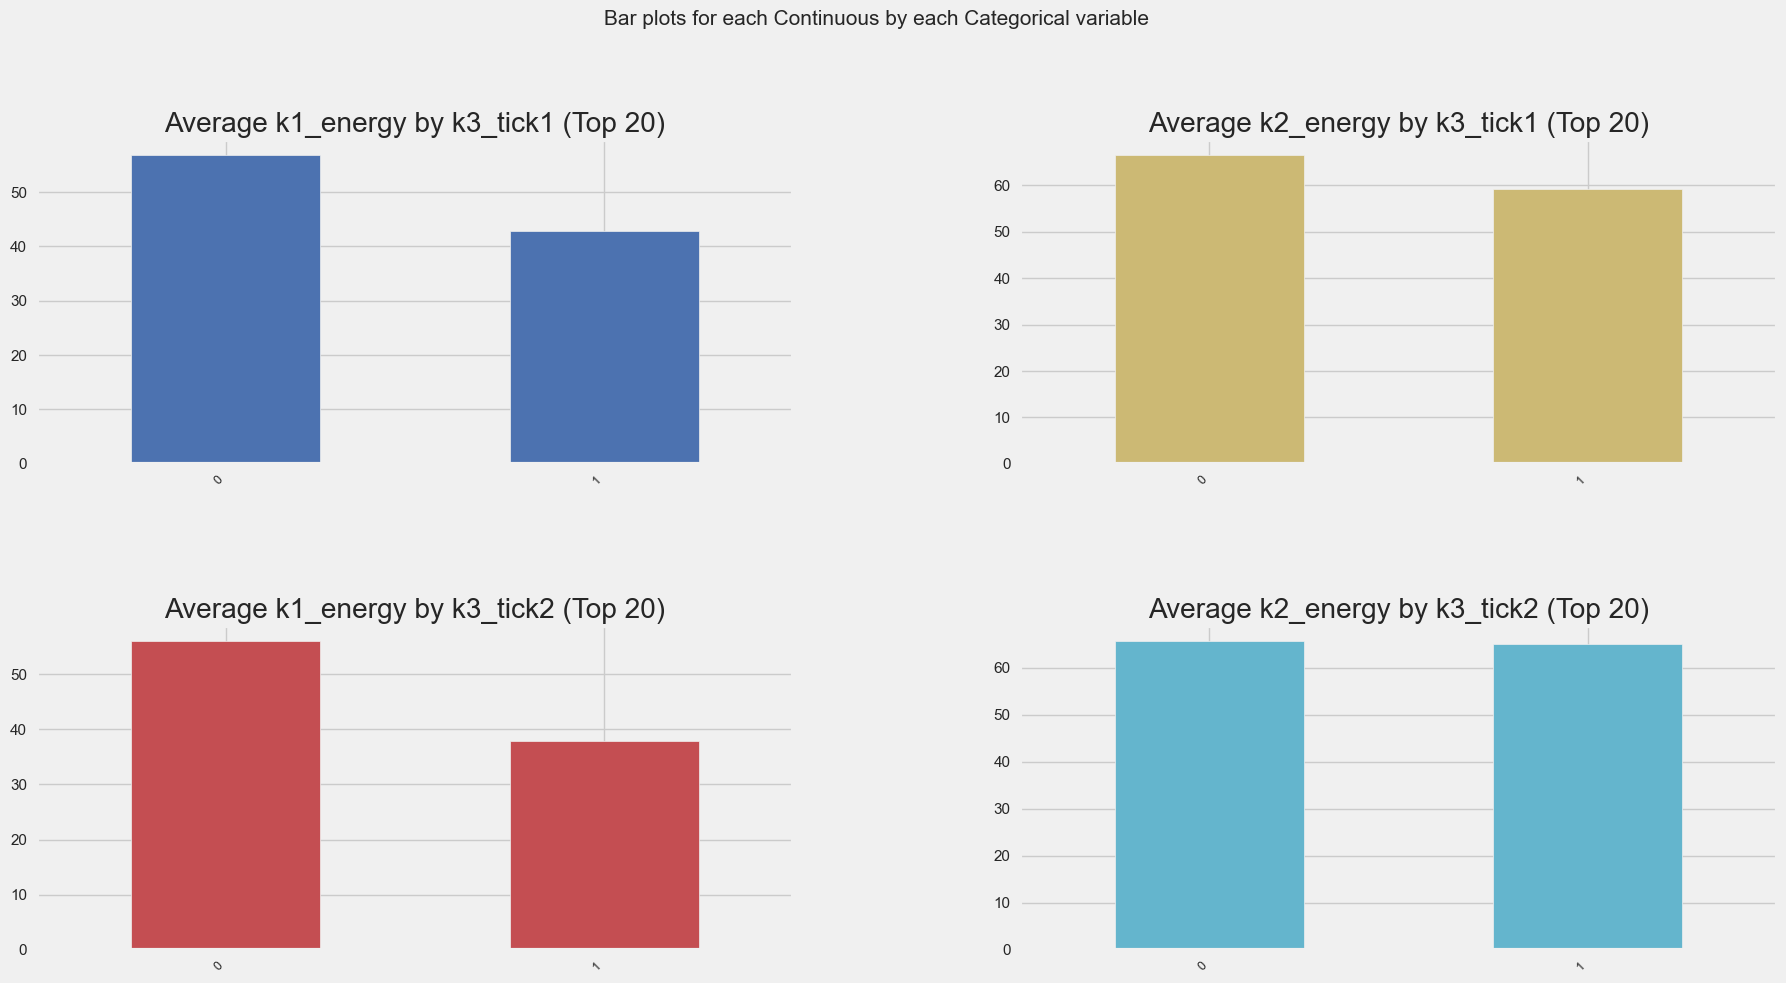

All Plots done
Time to run AutoViz = 3 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


In [5]:
# Use autoWiz to get a quick overview of the data
from autoviz.AutoViz_Class import AutoViz_Class

%matplotlib inline

AV = AutoViz_Class()
viz = AV.AutoViz("../data/Sample Student Data File.csv", sep=",")

In [6]:
df.head()

stu_id                    stu_name                          email  \
0  20004488           SAFFRON, Corgipoo     CorgipooSAF@connect.ust.hk   
1  20023331             HYSSOP, Chamois      ChamoisHYS@connect.ust.hk   
2  20043679               LEEKS, Beetle       BeetleLEE@connect.ust.hk   
3  20067232  CHRYSANTHEMUM, Abelisaurus  AbelisaurusCHR@connect.ust.hk   
4  20076931              CELERIAC, Aniu         AniuCEL@connect.ust.hk   

   k1_energy  k2_energy  k3_tick1  k3_tick2  my_pref  concerns  
0         26         80         0         0      NaN       NaN  
1         27         85         0         0      NaN       NaN  
2         71         40         0         0      NaN       NaN  
3         57         60         0         0      NaN       NaN  
4         54         80         0         0      NaN       NaN

In [7]:
df_K1_Energy = df[['k1_energy']]
df_K1_Energy['k1_energy'].describe()


count    100.0000
mean      55.0700
std       20.1275
min       10.0000
25%       41.5000
50%       59.0000
75%       68.2500
max      100.0000
Name: k1_energy, dtype: float64

In [8]:
df_K2_Energy = df[['k2_energy']]
df_K2_Energy['k2_energy'].describe()

count    100.000000
mean      65.600000
std       14.482312
min       30.000000
25%       58.750000
50%       65.000000
75%       76.250000
max       90.000000
Name: k2_energy, dtype: float64

In [9]:
df_K3_Tick1 = df[['k3_tick1']]
df_K3_Tick1['k3_tick1'].value_counts()

0    88
1    12
Name: k3_tick1, dtype: int64

In [10]:
df_K3_Tick2 = df[['k3_tick2']]
df_K3_Tick2['k3_tick2'].value_counts()

0    95
1     5
Name: k3_tick2, dtype: int64

In [11]:
print("Amount of rows with k1_energy over average: ", len(df[df['k1_energy'] > df['k1_energy'].mean()]))

Amount of rows with k1_energy over average:  54


In [12]:
def add_remaining_student(df, students_df, teams):
    min_diff = 100000
    min_diff_index = 0
    for index, row in students_df.iterrows():
        k1_energy_avg = (sum(student['k1_energy'] for student in teams[0]) + row['k1_energy']) / (len(teams[0]) + 1)
        k2_energy_avg = (sum(student['k2_energy'] for student in teams[0]) + row['k2_energy']) / (len(teams[0]) + 1)
        diff = abs(k1_energy_avg - df['k1_energy'].mean()) + abs(k2_energy_avg - df['k2_energy'].mean())
        if diff < min_diff:
            min_diff = diff
            min_diff_index = index

    teams[0].append(students_df.loc[min_diff_index])

    return teams

# Algorithm 1

Difference between the min and max k1_energy_avg:  12.583333333333336
Difference between the min and max k2_energy_avg:  18.33333333333333
Difference between the min and max k1_k2_energy_avg:  8.166666666666664


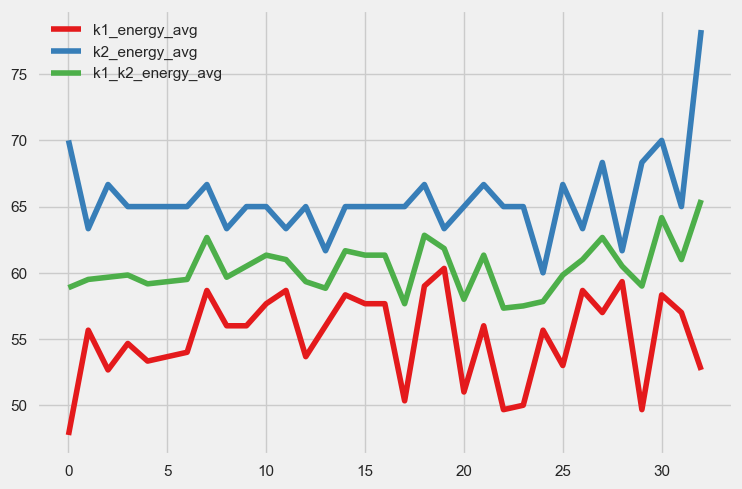

In [26]:

students_df = df.copy()
# students_df.sort_values(by=['k1_energy'], inplace=True, ascending=False)

teams = [[] for _ in range(33)]

for team in teams:
    for index, row in students_df.iterrows():
        if row['k1_energy'] >= df['k1_energy'].mean():
            team.append(row)
            students_df.drop(index, inplace=True)
            break

for team in teams:
    while len(team) < 3:
        min_diff = 100000
        min_diff_index = 0
        for index, row in students_df.iterrows():
            k1_energy_avg = (sum(student['k1_energy'] for student in team) + row['k1_energy']) / (len(team) + 1)
            k2_energy_avg = (sum(student['k2_energy'] for student in team) + row['k2_energy']) / (len(team) + 1)
            diff = abs(k1_energy_avg - df['k1_energy'].mean()) + abs(k2_energy_avg - df['k2_energy'].mean())
            if diff < min_diff:
                min_diff = diff
                min_diff_index = index
        team.append(students_df.loc[min_diff_index])
        students_df.drop(min_diff_index, inplace=True)

teams = add_remaining_student(df, students_df, teams)

k1_energy_avg = [sum(student['k1_energy'] for student in team) / len(team) for team in teams]
k2_energy_avg = [sum(student['k2_energy'] for student in team) / len(team) for team in teams]
k1_k2_energy_avg = [(sum(student['k1_energy'] + student['k2_energy'] for student in team) / 2) / len(team) for team in teams]

print("Difference between the min and max k1_energy_avg: ", max(k1_energy_avg) - min(k1_energy_avg))
print("Difference between the min and max k2_energy_avg: ", max(k2_energy_avg) - min(k2_energy_avg))
print("Difference between the min and max k1_k2_energy_avg: ", max(k1_k2_energy_avg) - min(k1_k2_energy_avg))

plt.plot(k1_energy_avg, label="k1_energy_avg")
plt.plot(k2_energy_avg, label="k2_energy_avg")
plt.plot(k1_k2_energy_avg, label="k1_k2_energy_avg")
plt.legend()

# Algorithm 2 (Sort)

Difference between the min and max k1_energy_avg:  15.0
Difference between the min and max k2_energy_avg:  13.333333333333336
Difference between the min and max k1_k2_energy_avg:  10.666666666666664


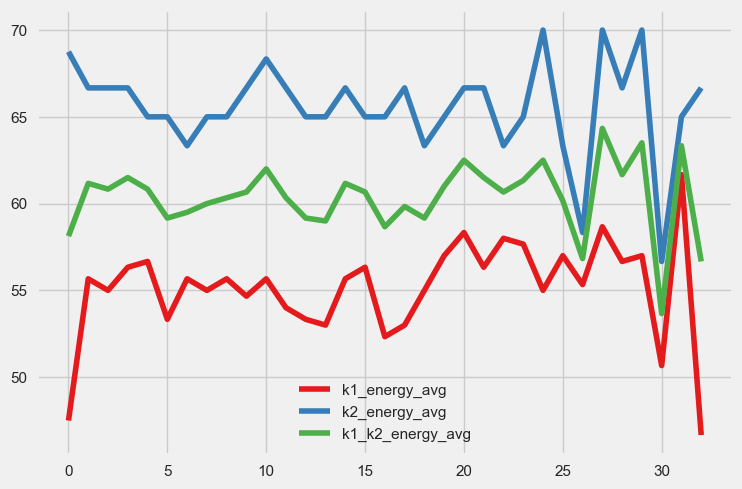

In [25]:

students_df = df.copy()
students_df.sort_values(by=['k1_energy'], inplace=True, ascending=False)

teams = [[] for _ in range(33)]

for team in teams:
    for index, row in students_df.iterrows():
        if row['k1_energy'] >= df['k1_energy'].mean():
            team.append(row)
            students_df.drop(index, inplace=True)
            break

for team in teams:
    while len(team) < 3:
        min_diff = 100000
        min_diff_index = 0
        for index, row in students_df.iterrows():
            k1_energy_avg = (sum(student['k1_energy'] for student in team) + row['k1_energy']) / (len(team) + 1)
            k2_energy_avg = (sum(student['k2_energy'] for student in team) + row['k2_energy']) / (len(team) + 1)
            diff = abs(k1_energy_avg - df['k1_energy'].mean()) + abs(k2_energy_avg - df['k2_energy'].mean())
            if diff < min_diff:
                min_diff = diff
                min_diff_index = index
        team.append(students_df.loc[min_diff_index])
        students_df.drop(min_diff_index, inplace=True)

teams = add_remaining_student(df, students_df, teams)

k1_energy_avg = [sum(student['k1_energy'] for student in team) / len(team) for team in teams]
k2_energy_avg = [sum(student['k2_energy'] for student in team) / len(team) for team in teams]
k1_k2_energy_avg = [(sum(student['k1_energy'] + student['k2_energy'] for student in team) / 2) / len(team) for team in teams]

print("Difference between the min and max k1_energy_avg: ", max(k1_energy_avg) - min(k1_energy_avg))
print("Difference between the min and max k2_energy_avg: ", max(k2_energy_avg) - min(k2_energy_avg))
print("Difference between the min and max k1_k2_energy_avg: ", max(k1_k2_energy_avg) - min(k1_k2_energy_avg))

plt.plot(k1_energy_avg, label="k1_energy_avg")
plt.plot(k2_energy_avg, label="k2_energy_avg")
plt.plot(k1_k2_energy_avg, label="k1_k2_energy_avg")
plt.legend()

# Algorithm 3 Reverse Sort

Difference between the min and max k1_energy_avg:  30.666666666666664
Difference between the min and max k2_energy_avg:  25.0
Difference between the min and max k1_k2_energy_avg:  11.000000000000007


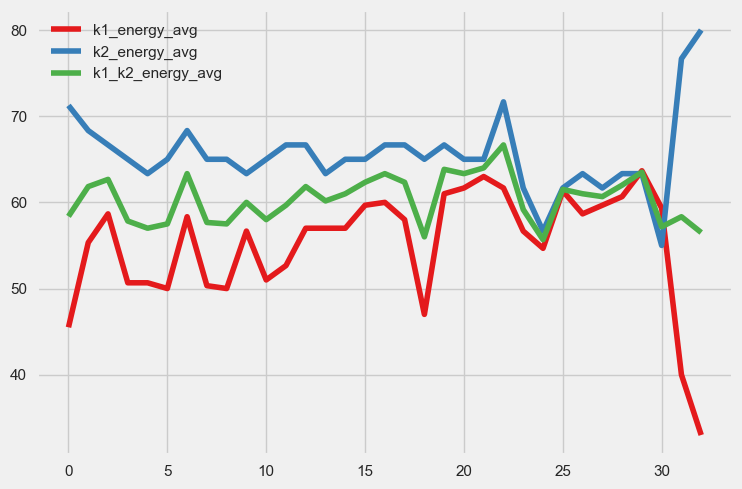

In [24]:

students_df = df.copy()
students_df.sort_values(by=['k1_energy'], inplace=True, ascending=True)

teams = [[] for _ in range(33)]

for team in teams:
    for index, row in students_df.iterrows():
        if row['k1_energy'] >= df['k1_energy'].mean():
            team.append(row)
            students_df.drop(index, inplace=True)
            break

for team in teams:
    while len(team) < 3:
        min_diff = 100000
        min_diff_index = 0
        for index, row in students_df.iterrows():
            k1_energy_avg = (sum(student['k1_energy'] for student in team) + row['k1_energy']) / (len(team) + 1)
            k2_energy_avg = (sum(student['k2_energy'] for student in team) + row['k2_energy']) / (len(team) + 1)
            diff = abs(k1_energy_avg - df['k1_energy'].mean()) + abs(k2_energy_avg - df['k2_energy'].mean())
            if diff < min_diff:
                min_diff = diff
                min_diff_index = index
        team.append(students_df.loc[min_diff_index])
        students_df.drop(min_diff_index, inplace=True)

teams = add_remaining_student(df, students_df, teams)

k1_energy_avg = [sum(student['k1_energy'] for student in team) / len(team) for team in teams]
k2_energy_avg = [sum(student['k2_energy'] for student in team) / len(team) for team in teams]
k1_k2_energy_avg = [(sum(student['k1_energy'] + student['k2_energy'] for student in team) / 2) / len(team) for team in teams]

print("Difference between the min and max k1_energy_avg: ", max(k1_energy_avg) - min(k1_energy_avg))
print("Difference between the min and max k2_energy_avg: ", max(k2_energy_avg) - min(k2_energy_avg))
print("Difference between the min and max k1_k2_energy_avg: ", max(k1_k2_energy_avg) - min(k1_k2_energy_avg))

plt.plot(k1_energy_avg, label="k1_energy_avg")
plt.plot(k2_energy_avg, label="k2_energy_avg")
plt.plot(k1_k2_energy_avg, label="k1_k2_energy_avg")
plt.legend()

# Algorithm 4 (Team Adding Spread)
Should in theory be more reliable for other datasets but performed much worse for these one

Difference between the min and max k1_energy_avg:  27.66666666666667
Difference between the min and max k2_energy_avg:  15.000000000000007
Difference between the min and max k1_k2_energy_avg:  13.833333333333329


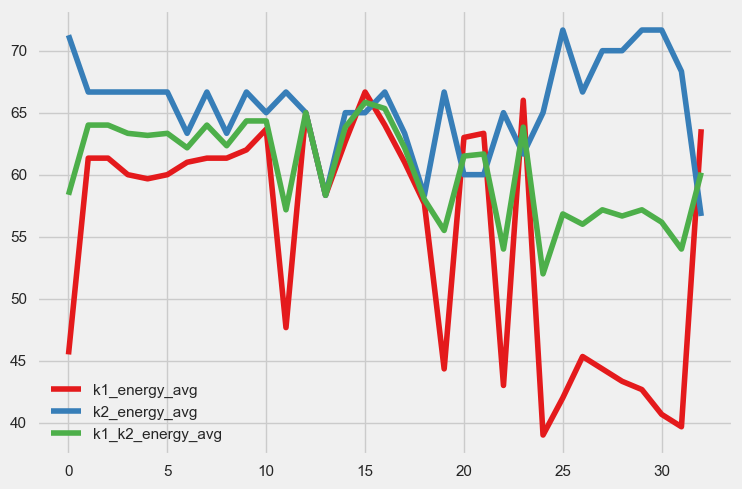

In [23]:

students_df = df.copy()
students_df.sort_values(by=['k1_energy'], inplace=True, ascending=True)

teams = [[] for _ in range(33)]

for team in teams:
    for index, row in students_df.iterrows():
        if row['k1_energy'] >= df['k1_energy'].mean():
            team.append(row)
            students_df.drop(index, inplace=True)
            break

for _ in range(2):
    for team in teams:
        min_diff = 100000
        min_diff_index = 0
        for index, row in students_df.iterrows():
            k1_energy_avg = (sum(student['k1_energy'] for student in team) + row['k1_energy']) / (len(team) + 1)
            k2_energy_avg = (sum(student['k2_energy'] for student in team) + row['k2_energy']) / (len(team) + 1)
            diff = abs(k1_energy_avg - df['k1_energy'].mean()) + abs(k2_energy_avg - df['k2_energy'].mean())
            if diff < min_diff:
                min_diff = diff
                min_diff_index = index
        team.append(students_df.loc[min_diff_index])
        students_df.drop(min_diff_index, inplace=True)

teams = add_remaining_student(df, students_df, teams)

k1_energy_avg = [sum(student['k1_energy'] for student in team) / len(team) for team in teams]
k2_energy_avg = [sum(student['k2_energy'] for student in team) / len(team) for team in teams]
k1_k2_energy_avg = [(sum(student['k1_energy'] + student['k2_energy'] for student in team) / 2) / len(team) for team in teams]

print("Difference between the min and max k1_energy_avg: ", max(k1_energy_avg) - min(k1_energy_avg))
print("Difference between the min and max k2_energy_avg: ", max(k2_energy_avg) - min(k2_energy_avg))
print("Difference between the min and max k1_k2_energy_avg: ", max(k1_k2_energy_avg) - min(k1_k2_energy_avg))

plt.plot(k1_energy_avg, label="k1_energy_avg")
plt.plot(k2_energy_avg, label="k2_energy_avg")
plt.plot(k1_k2_energy_avg, label="k1_k2_energy_avg")
plt.legend()

# Algorithm 5 (Using Combinations)

Difference between the min and max k1_energy_avg:  24.333333333333336
Difference between the min and max k2_energy_avg:  15.083333333333329
Difference between the min and max k1_k2_energy_avg:  12.5


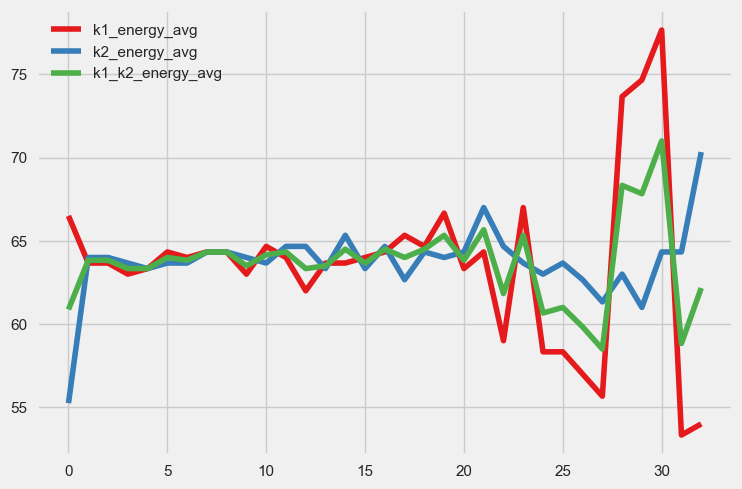

In [121]:

students_df = df.copy()
students_df.sort_values(by=['k1_energy'], inplace=True, ascending=False)

teams = [[] for _ in range(33)]

for team in teams:
    for index, row in students_df.iterrows():
        if row['k1_energy'] >= df['k1_energy'].mean():
            team.append(row)
            students_df.drop(index, inplace=True)
            break

for team in teams:   
    student_pairs = list(itertools.combinations(students_df.index, 2))
    min_diff = 100000
    min_diff_index = 0
    for index, pair in enumerate(student_pairs):
        k1_energy_avg = (sum(student['k1_energy'] for student in team) + students_df.loc[pair[0]]['k1_energy'] + students_df.loc[pair[1]]['k1_energy']) / (len(team) + 2)
        k2_energy_avg = (sum(student['k2_energy'] for student in team) + students_df.loc[pair[0]]['k2_energy'] + students_df.loc[pair[1]]['k2_energy']) / (len(team) + 2)
        diff = abs(k1_energy_avg - df['k1_energy'].mean()) + abs(k2_energy_avg - df['k2_energy'].mean())
        if diff < min_diff:
            min_diff = diff
            min_diff_index = index
    team.append(students_df.loc[student_pairs[min_diff_index][0]])
    team.append(students_df.loc[student_pairs[min_diff_index][1]])
    students_df.drop(student_pairs[min_diff_index][0], inplace=True)
    students_df.drop(student_pairs[min_diff_index][1], inplace=True)

teams = add_remaining_student(df, students_df, teams)

k1_energy_avg = [sum(student['k1_energy'] for student in team) / len(team) for team in teams]
k2_energy_avg = [sum(student['k2_energy'] for student in team) / len(team) for team in teams]
k1_k2_energy_avg = [(sum(student['k1_energy'] + student['k2_energy'] for student in team) / 2) / len(team) for team in teams]

print("Difference between the min and max k1_energy_avg: ", max(k1_energy_avg) - min(k1_energy_avg))
print("Difference between the min and max k2_energy_avg: ", max(k2_energy_avg) - min(k2_energy_avg))
print("Difference between the min and max k1_k2_energy_avg: ", max(k1_k2_energy_avg) - min(k1_k2_energy_avg))

plt.plot(k1_energy_avg, label="k1_energy_avg")
plt.plot(k2_energy_avg, label="k2_energy_avg")
plt.plot(k1_k2_energy_avg, label="k1_k2_energy_avg")
plt.legend()

# Algorithm 6 (Using Combinations and Selective start student)

Difference between the min and max k1_energy_avg:  11.0
Difference between the min and max k2_energy_avg:  15.666666666666664
Difference between the min and max k1_k2_energy_avg:  8.25


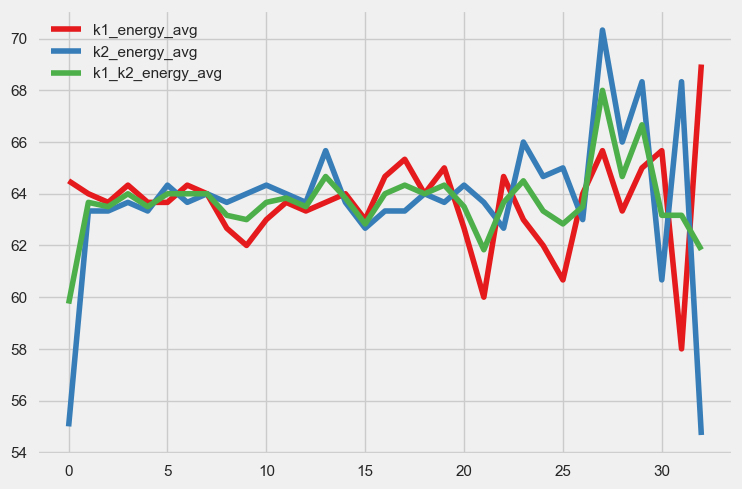

In [122]:

students_df = df.copy()
students_df.sort_values(by=['k1_energy'], inplace=True, ascending=False)

teams = [[] for _ in range(33)]

students_above_mean = students_df[students_df['k1_energy'] >= df['k1_energy'].mean()]
for team in teams:
    team.append(students_above_mean.iloc[len(students_above_mean) // 2])
    students_above_mean.drop(students_above_mean.index[len(students_above_mean) // 2], inplace=True)
    students_df.drop(team[-1].name, inplace=True)

for team in teams:
    student_pairs = list(itertools.combinations(students_df.index, 2))
    min_diff = 100000
    min_diff_index = 0

    for index, pair in enumerate(student_pairs):
        k1_energy_avg = (sum(student['k1_energy'] for student in team) + students_df.loc[pair[0]]['k1_energy'] + students_df.loc[pair[1]]['k1_energy']) / (len(team) + 2)
        k2_energy_avg = (sum(student['k2_energy'] for student in team) + students_df.loc[pair[0]]['k2_energy'] + students_df.loc[pair[1]]['k2_energy']) / (len(team) + 2)
        diff = abs(k1_energy_avg - df['k1_energy'].mean()) + abs(k2_energy_avg - df['k2_energy'].mean())
        if diff < min_diff:
            min_diff = diff
            min_diff_index = index

    team.append(students_df.loc[student_pairs[min_diff_index][0]])
    team.append(students_df.loc[student_pairs[min_diff_index][1]])
    students_df.drop(student_pairs[min_diff_index][0], inplace=True)
    students_df.drop(student_pairs[min_diff_index][1], inplace=True)

teams = add_remaining_student(df, students_df, teams)

k1_energy_avg = [sum(student['k1_energy'] for student in team) / len(team) for team in teams]
k2_energy_avg = [sum(student['k2_energy'] for student in team) / len(team) for team in teams]
k1_k2_energy_avg = [(sum(student['k1_energy'] + student['k2_energy'] for student in team) / 2) / len(team) for team in teams]

print("Difference between the min and max k1_energy_avg: ", max(k1_energy_avg) - min(k1_energy_avg))
print("Difference between the min and max k2_energy_avg: ", max(k2_energy_avg) - min(k2_energy_avg))
print("Difference between the min and max k1_k2_energy_avg: ", max(k1_k2_energy_avg) - min(k1_k2_energy_avg))

plt.plot(k1_energy_avg, label="k1_energy_avg")
plt.plot(k2_energy_avg, label="k2_energy_avg")
plt.plot(k1_k2_energy_avg, label="k1_k2_energy_avg")
plt.legend()

In [112]:
df.head()

stu_id   stu_name               email  k1_energy  k2_energy  k3_tick1  \
0       0  Student 0  student0@gmail.com         97         98         0   
1       1  Student 1  student1@gmail.com         48         98         1   
2       2  Student 2  student2@gmail.com         54         98         0   
3       3  Student 3  student3@gmail.com         12         94         0   
4       4  Student 4  student4@gmail.com         99         97         0   

   k3_tick2  my_pref     concerns  
0         1        0  No concerns  
1         0        1  No concerns  
2         1        0  No concerns  
3         0        0  No concerns  
4         0        0  No concerns

In [34]:
import random

In [116]:
def generate_data(students_amount, k1_energy_avg, k2_energy_avg):
    df = pd.DataFrame(columns=['stu_id', 'stu_name', 'email', 'k1_energy', 'k2_energy', 'k3_tick1', 'k3_tick2', 'my_pref', 'concerns'])

    for i in range(students_amount):
        df.loc[i] = [i, f"Student {str(i)}", f"student{str(i)}@gmail.com", random.randint(0, 100), random.randint(0, 100),
            random.randint(0, 1), random.randint(0, 1), random.randint(0, 1), "No concerns"
        ]


    while df['k1_energy'].mean() < k1_energy_avg * 0.95 or df['k1_energy'].mean() > k1_energy_avg * 1.05:
        student = df.iloc[random.randint(0, students_amount - 1)]
        if student['k1_energy'] < 5 or student['k1_energy'] > 95:
            continue
        
        if df['k1_energy'].mean() > k1_energy_avg:                
            df.loc[student.name, 'k1_energy'] -= random.randint(0, 5)
        else:
            df.loc[student.name, 'k1_energy'] += random.randint(0, 5)

    while df['k2_energy'].mean() < k2_energy_avg * 0.95 or df['k2_energy'].mean() > k2_energy_avg * 1.05:
        student = df.iloc[random.randint(0, students_amount - 1)]
        if student['k2_energy'] < 5 or student['k2_energy'] > 95:
            continue
        
        if df['k2_energy'].mean() > k2_energy_avg:                
            df.loc[student.name, 'k2_energy'] -= random.randint(0, 5)
        else:
            df.loc[student.name, 'k2_energy'] += random.randint(0, 5)

    return df

In [120]:
df = generate_data(100, 67, 67)
print(df['k1_energy'].mean())
print(df['k2_energy'].mean())
print("K1 Energy Max: ", df['k1_energy'].max())
print("K1 Energy Min: ", df['k1_energy'].min())
print("K2 Energy Max: ", df['k2_energy'].max())
print("K2 Energy Min: ", df['k2_energy'].min())

63.65
63.68
K1 Energy Max:  100
K1 Energy Min:  0
K2 Energy Max:  99
K2 Energy Min:  2


In [107]:
df.head()

stu_id   stu_name               email  k1_energy  k2_energy  k3_tick1  \
0       0  Student 0  student0@gmail.com         88         52         0   
1       1  Student 1  student1@gmail.com         91         40         1   
2       2  Student 2  student2@gmail.com         57         49         1   
3       3  Student 3  student3@gmail.com         28         32         0   
4       4  Student 4  student4@gmail.com          4         59         1   

   k3_tick2  my_pref     concerns  
0         1        1  No concerns  
1         1        0  No concerns  
2         0        1  No concerns  
3         1        1  No concerns  
4         1        1  No concerns